In [1]:
from selenium import webdriver
import time
import requests
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
path = '/Users/JonghyunChung/chromedriver'
driver = webdriver.Chrome(path)

driver.implicitly_wait(3) 

### 키워드 설정

In [264]:
naver_shopping_url = "https://shopping.naver.com/"

In [265]:
driver.get(naver_shopping_url)
time.sleep(3)

### 검색한 페이지로 넘어감


In [266]:
## 첫번째 상품 가격 설정

In [267]:
input = driver.find_element_by_name('query')
searchName = "여성 레이스 스커트"
input.send_keys(searchName)
time.sleep(3)
driver.find_element_by_link_text("네이버 검색").click()
time.sleep(1)
driver.execute_script("window.scrollTo(0, 15000)")
time.sleep(2)

In [268]:
clo_html = driver.page_source
clo_html = bs(clo_html, 'lxml')

In [269]:
page_itemList = clo_html.find_all("li", {"class","basicList_item__2XT81"})


In [270]:
print(len(page_itemList))

46


In [271]:
raw_data = pd.DataFrame(columns = ["이름","가격","태그","디테일","쇼핑몰","찜,구매","광고상품","페이지"])
raw_data

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지


In [272]:
for i in range(1,10):
    pa = i
    for page in page_itemList:
        li = []
        try:
            title = page.find("a",{"class","basicList_link__1MaTN"}).text
            li.append(title)
        except:
            li.append(np.NaN)
        try:
            price = page.find("span",{"class","price_num__2WUXn"}).text
            li.append(price)
        except:
            try:
                price = page.find("span",{"class","basicList_num__1yXM9"}).text
                li.append(price)
            except:
                li.append(np.NaN)
        try:
            tag = page.find("div",{"class","basicList_depth__2QIie"}).get_text(" ", strip = True)
            li.append(tag)
        except:
            li.append(np.NaN)
        try:
            detail = page.find("div",{"class","basicList_detail_box__3ta3h"}).get_text(" ", strip = True)
            li.append(detail)
        except:
            li.append(np.NaN)
        try:
            mall = page.find("a",{"class","basicList_mall__sbVax"}).get_text(" ", strip = True)
            li.append(mall)
        except:
            li.append(np.NaN)
        try:
            heart = page.find("div",{"class","basicList_etc_box__1Jzg6"}).get_text(" ", strip = True)
            li.append(heart)
        except:
            li.append(np.NaN)
        try:
            ad = page.find("button",{"class","ad_ad_stk__12U34"}).get_text(" ", strip = True)
            li.append(True)
        except:
            li.append(False)
        li.append(pa)
        raw_data = pd.concat([raw_data,(pd.DataFrame(np.array(li).reshape(1,8), columns = ["이름","가격","태그","디테일","쇼핑몰","찜,구매","광고상품","페이지"]))])
    driver.find_element_by_class_name("pagination_next__1ITTf").click()    
    time.sleep(1.5)
    driver.execute_script("window.scrollTo(0, 15000)") 
    time.sleep(2)
    clo_html = driver.page_source
    clo_html = bs(clo_html, 'lxml')
    page_itemList = clo_html.find_all("li", {"class","basicList_item__2XT81"})

In [273]:
raw_data[raw_data["이름"].str.contains("포네르쎄")]

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지


In [274]:
raw_data

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
0,에이치라인 수술 레이스 밴딩 스커트,"29,000원",패션의류 여성의류 스커트,"주요소재 : 면 , 폴리에스테르 | 스커트스타일 : H라인 | 총기장 : 롱 | 패...",드볼레-S,등록일 2020.09. 찜하기 1 신고하기,True,1
0,[전시상품] 레이스 스커트 MS97EXSB0Z100,"100,210원",패션의류 여성의류 스커트,,,등록일 2020.05. 찜하기 0 신고하기,True,1
0,[전시상품] 메다용 레이스 스커트 MU97EYHBUK100,"88,470원",패션의류 여성의류 스커트,,,등록일 2020.05. 찜하기 0 신고하기,True,1
0,마리끌레르 레이스 체크 스커트 MAABSK01M4,"80,010원",패션의류 여성의류 스커트,,쇼핑몰별 최저가,리뷰 별점 4.9 102 등록일 2020.06. 찜하기 167 정보 수정요청,False,1
0,샤를 뜨개 니트 레이스 스커트,"19,800원",패션의류 여성의류 스커트,,쇼핑몰별 최저가,"리뷰 별점 4.5 1,361 등록일 2020.07. 찜하기 10 정보 수정요청",False,1
...,...,...,...,...,...,...,...,...
0,레이스 청치마 H라인 데님 롱 스커트,"34,200원",패션의류 여성의류 스커트,,쇼핑몰별 최저가,리뷰 별점 4.7 15 등록일 2019.11. 찜하기 30 정보 수정요청,False,9
0,여름 가을 니트 펀칭 뜨개 레이스 자수 허리 밴딩 데일리 하객룩 머메이드 롱 스커트,"16,000원",패션의류 여성의류 스커트,"주요소재 : 면 , 폴리에스테르 | 스커트스타일 : 머메이드 | 총기장 : 미디 |...",SONGSARI,등록일 2020.08. 찜하기 11 신고하기 톡톡,False,9
0,여성 여름 레이스 주름 스커트 치마 봄블라우스 블라우스 원피스 여성바,"28,040원",패션의류 여성의류 스커트,,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,9
0,플라워 레이스 스커트 울산성남점,"27,350원",패션의류 여성의류 스커트,,쇼핑몰별 최저가,등록일 2020.08. 찜하기 0 정보 수정요청,False,9


## 네이버 쇼핑 10페이지 이내에 있는 상품 비교

In [275]:
raw_data.describe()

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
count,414,414,414,414,414,414,414,414
unique,409,326,1,83,81,345,2,9
top,보웬 빈스 레이스 스커트,"19,800원",패션의류 여성의류 스커트,,쇼핑몰별 최저가,등록일 2020.08. 찜하기 0 정보 수정요청,False,4
freq,3,5,414,326,291,31,360,46


In [276]:
raw_data.쇼핑몰.value_counts()

쇼핑몰별 최저가     291
              27
잇미샤공식온라인몰      3
데일리앤77         3
롱이너프           3
            ... 
꼼모아            1
다다데이즈          1
엔디어로지          1
드볼레-S          1
더 리즈비          1
Name: 쇼핑몰, Length: 81, dtype: int64

In [277]:
raw_data.쇼핑몰.value_counts().nlargest(10)

쇼핑몰별 최저가     291
              27
잇미샤공식온라인몰      3
데일리앤77         3
롱이너프           3
러브패리스          2
하리포유           2
썸제이            2
꼬박이            2
여자여자몰          2
Name: 쇼핑몰, dtype: int64

In [278]:
## 총 414개중에서 198개가 여러군대에 남품하고 있는 구조 (10페이지 안에 있는거에서)

In [279]:
raw_data["가격"] = raw_data["가격"].str.strip(",원").str.replace(",","").str.replace("nan","0").astype(int)

In [280]:
raw_data["가격"].describe()

count       414.0
mean      51824.7
std       72006.8
min        2620.0
25%       19900.0
50%       32450.0
75%       60017.5
max     1109000.0
Name: 가격, dtype: float64

In [281]:
sum(raw_data["가격"] == 0)

0

In [282]:
pd.options.display.float_format = '{:.1f}'.format

count       414.0
mean      51824.7
std       72006.8
min        2620.0
25%       19900.0
50%       32450.0
75%       60017.5
max     1109000.0
Name: 가격, dtype: float64


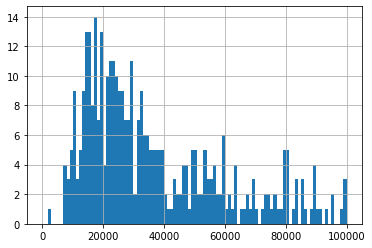

In [283]:
#nan 값 뺀거
print(raw_data["가격"][raw_data["가격"] != 0].describe())
raw_data["가격"][raw_data["가격"] != 0].hist(bins = 100, range = (0, 100000))
plt.show()
## 가격 설정의 지표가 된다. 첫번째 상품 같은 경우에는 25

In [284]:
keyword = []
for i in raw_data["이름"]:
    keyword += i.split()
pd.Series(keyword).value_counts().head(20)

레이스     305
스커트     266
롱        79
밴딩       57
롱스커트     31
머메이드     29
H라인      29
펀칭       26
플리츠      25
샤        24
플레어      23
A라인      21
플라워      21
미디       20
망사       19
잇미샤      17
샤스커트     17
자수       15
치마       13
여름       13
dtype: int64

In [285]:
raw_data[raw_data["이름"].str.contains("+",regex = False)]

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지


### 키워드 바탕 네이밍

In [286]:
keyWord = pd.Series(keyword).value_counts().index

In [287]:
rate_data = pd.DataFrame(columns = ["keyword", "search_total", "Insight_rate","sort_value"])


In [288]:
rate_data

,keyword,search_total,Insight_rate,sort_value


In [289]:
Dic = {}
for i in range(10):
    '''
    행동 패턴을 위해 여성은 클릭하는 거로 설정 -> 안되네..
    '''
    naver_shopping_url = "https://shopping.naver.com/"
    driver.get(naver_shopping_url)
    time.sleep(3)
    input = driver.find_element_by_name('query')
    if keyWord[i] != searchName.split()[-1]:  
        input.send_keys(keyWord[i] + searchName.split()[-1])
        time.sleep(3)
        driver.find_element_by_link_text("네이버 검색").click()
        time.sleep(1)
        html = driver.page_source
        html = bs(html, 'lxml')
        totalnum = int(html.find("span",{"class", "subFilter_num__2x0jq"}).text.replace(",",""))
        Dic[keyWord[i] + searchName.split()[-1]] = totalnum

In [290]:
## 이건 키워드별 네이버 전체 검색수
Dic

{'레이스스커트': 570275,
 '롱스커트': 2380556,
 '밴딩스커트': 537149,
 '롱스커트스커트': 2380556,
 '머메이드스커트': 211845,
 'H라인스커트': 619072,
 '펀칭스커트': 76417,
 '플리츠스커트': 629738,
 '샤스커트': 86281}

In [291]:
#이제 키워드를 바탕으로 검색어 찾기

In [292]:
naver_shoppingInsight_url = "https://datalab.naver.com/shoppingInsight/sKeyword.naver"
driver.get(naver_shoppingInsight_url)

In [293]:
driver.find_element_by_id("20_gender_1").click()
driver.find_element_by_id("21_age_3").click()
driver.find_element_by_id("21_age_4").click()
driver.find_element_by_class_name("select.w4").click()
driver.find_element_by_link_text("주간").click()

In [294]:
for i in range(5):
    input = driver.find_element_by_id("item_keyword")
    input.send_keys(list(Dic.keys())[i])
    input.send_keys(Keys.RETURN)

In [295]:
driver.find_element_by_class_name("btn_submit").click()

In [299]:
#공급
list(Dic.values())[:5]
#수요
result = [8,22,4,0,9]

In [300]:
list(Dic.keys())[:5]

['레이스스커트', '롱스커트', '밴딩스커트', '롱스커트스커트', '머메이드스커트']

In [301]:
#수요/공급
1000000*pd.Series(result)/pd.Series(list(Dic.values())[:5])

0   14.0
1    9.2
2    7.4
3    0.0
4   42.5
dtype: float64

In [33]:
raw_data["태그"].value_counts()

패션의류 여성의류 카디건    379
nan               35
Name: 태그, dtype: int64

In [34]:
raw_data["디테일"].value_counts()
#디테일 제대로 설명 안해놓은게 많다?? --> 우리는 제대로 해야한다.

                                                                                                                  327
nan                                                                                                                35
주요소재 : 폴리우레탄 , 아크릴 | 총기장 : 숏 | 소매기장 : 반팔 | 종류 : 니트카디건 | 네크라인 : U넥 | 핏 : 기본핏 | 패턴 : 스트라이프 | 성별 : 여성용                 2
주요소재 : 폴리에스테르 | 총기장 : 기본 | 소매기장 : 긴팔 | 네크라인 : V넥 | 핏 : 기본핏 | 패턴 : 스트라이프 | 성별 : 여성용                                  2
주요소재 : 면 , 레이온/인견 | 총기장 : 숏 | 소매기장 : 반팔 | 종류 : 기타 | 네크라인 : 라운드넥 | 핏 : 슬림핏 | 패턴 : 스트라이프                              1
주요소재 : 면 , 마/리넨 | 총기장 : 기본 | 소매기장 : 긴팔 | 종류 : 면카디건 | 네크라인 : 라운드넥 | 핏 : 루즈핏 | 패턴 : 스트라이프                             1
주요소재 : 폴리에스테르 , 마/리넨 | 총기장 : 롱 | 소매기장 : 긴팔 | 종류 : 로브카디건 | 네크라인 : 후드넥 | 핏 : 루즈핏 | 패턴 : 스트라이프                         1
주요소재 : 폴리에스테르 | 총기장 : 기본 | 소매기장 : 긴팔 | 종류 : 니트카디건 | 네크라인 : V넥 | 핏 : 슬림핏 | 패턴 : 스트라이프 | 성별 : 여성용                     1
주요소재 : 면 , 폴리에스테르 | 총기장 : 롱 | 소매기장 : 긴팔 | 종류 : 롱카디건 | 네크

In [35]:
raw_data.head(50) #첫번째 페이지 정보

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
0,써니 앤코 라인로브 CD 썸머 여성 의류 국내제작 아크릴 여름 데일리룩,20700,패션의류 여성의류 카디건,주요소재 : 아크릴 | 총기장 : 롱 | 소매기장 : 긴팔 | 종류 : 로브카디건 ...,써니 앤코,등록일 2020.06. 찜하기 0 신고하기,True,1
0,럭키슈에뜨 스트라이프 레터링 롱 가디건 핑크,378100,패션의류 여성의류 카디건,,,등록일 2020.01. 찜하기 1 신고하기,True,1
0,럭키슈에뜨 스트라이프 레터링 롱 가디건 네이비,378100,패션의류 여성의류 카디건,,,등록일 2020.01. 찜하기 0 신고하기,True,1
0,타미힐피거 여성 시그니처 스트라이프 베이직 가디건 7698073 76A0453,37900,패션의류 여성의류 카디건,,쇼핑몰별 최저가,리뷰 별점 4.5 99 등록일 2020.06. 찜하기 21 정보 수정요청,False,1
0,스트라이프 린넨 카라 니트 가디건,13900,패션의류 여성의류 카디건,,쇼핑몰별 최저가,리뷰 별점 4.2 50 등록일 2020.08. 찜하기 15 정보 수정요청,False,1
0,타미힐피거 라운드넥 스트라이프 패턴 여성 가디건,45000,패션의류 여성의류 카디건,,쇼핑몰별 최저가,리뷰 별점 4.3 3 등록일 2020.07. 찜하기 15 정보 수정요청,False,1
0,여름 로브 가디건 피카소,18800,패션의류 여성의류 카디건,"주요소재 : 폴리에스테르 , 레이온/인견 | 총기장 : 롱 | 소매기장 : 7부 |...",데일리앤77,"리뷰 2,355 구매건수 96 등록일 2019.06. 찜하기 342 신고하기 톡톡",False,1
0,여름 원단좋은 쿨 얇은 시스루 가디건 반팔 심플 스트라이프 셔츠 볼레로 휴양지 롱 ...,12400,패션의류 여성의류 카디건,"주요소재 : 시폰 , 폴리에스테르 | 총기장 : 롱 | 소매기장 : 긴팔 | 종류 ...",오늘날씨엔,리뷰 68 등록일 2020.05. 찜하기 217 신고하기 톡톡,False,1
0,타미힐피거 여성 스트라이프 패턴드 라운드넥 버튼다운 가디건 3컬러,39700,패션의류 여성의류 카디건,,쇼핑몰별 최저가,리뷰 별점 5.0 12 등록일 2020.08. 찜하기 3 정보 수정요청,False,1
0,톰브라운 4바 스트라이프 릴랙스핏 메리노 울 가디건 035 FKC334A 00014,993000,패션의류 여성의류 카디건,,쇼핑몰별 최저가,리뷰 별점 1.0 1 등록일 2020.07. 찜하기 2 정보 수정요청,False,1


In [ ]:
raw_data.tail(50)

In [28]:
raw_data.to_excel("린넨벨트"+".xlsx")

40
count       360.000000
mean      34522.866667
std       20932.090302
min        8010.000000
25%       21975.000000
50%       27825.000000
75%       39825.000000
max      179280.000000
Name: 가격, dtype: float64


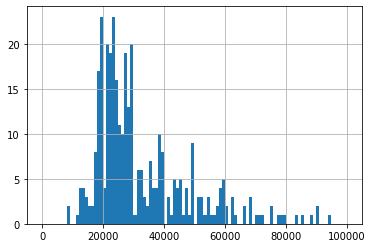

In [33]:
naver_shopping_url = "https://shopping.naver.com/"

driver.get(naver_shopping_url)
time.sleep(3)

### 검색한 페이지로 넘어감


## 첫번째 상품 가격 설정

input = driver.find_element_by_name('query')
name = "차이나소매셔링 원피스"
input.send_keys(name)
time.sleep(3)
driver.find_element_by_link_text("네이버 검색").click()
time.sleep(1)
driver.execute_script("window.scrollTo(0, 15000)")
time.sleep(2)

clo_html = driver.page_source
clo_html = bs(clo_html, 'lxml')

page_itemList = clo_html.find_all("li", {"class","basicList_item__2XT81"})


print(len(page_itemList))

raw_data = pd.DataFrame(columns = ["이름","가격","태그","디테일","쇼핑몰","찜,구매","광고상품","페이지"])
raw_data

for i in range(1,10):
    pa = i
    for page in page_itemList:
        li = []
        try:
            title = page.find("a",{"class","basicList_link__1MaTN"}).text
            li.append(title)
        except:
            li.append(np.NaN)
        try:
            price = page.find("span",{"class","price_num__2WUXn"}).text
            li.append(price)
        except:
            try:
                price = page.find("span",{"class","basicList_num__1yXM9"}).text
                li.append(price)
            except:
                li.append(np.NaN)
        try:
            tag = page.find("div",{"class","basicList_depth__2QIie"}).get_text(" ", strip = True)
            li.append(tag)
        except:
            li.append(np.NaN)
        try:
            detail = page.find("div",{"class","basicList_detail_box__3ta3h"}).get_text(" ", strip = True)
            li.append(detail)
        except:
            li.append(np.NaN)
        try:
            mall = page.find("a",{"class","basicList_mall__sbVax"}).get_text(" ", strip = True)
            li.append(mall)
        except:
            li.append(np.NaN)
        try:
            heart = page.find("div",{"class","basicList_etc_box__1Jzg6"}).get_text(" ", strip = True)
            li.append(heart)
        except:
            li.append(np.NaN)
        try:
            ad = page.find("button",{"class","ad_ad_stk__12U34"}).get_text(" ", strip = True)
            li.append(True)
        except:
            li.append(False)
        li.append(pa)
        raw_data = pd.concat([raw_data,(pd.DataFrame(np.array(li).reshape(1,8), columns = ["이름","가격","태그","디테일","쇼핑몰","찜,구매","광고상품","페이지"]))])
    driver.find_element_by_class_name("pagination_next__1ITTf").click()    
    time.sleep(1.5)
    driver.execute_script("window.scrollTo(0, 15000)") 
    time.sleep(2)
    clo_html = driver.page_source
    clo_html = bs(clo_html, 'lxml')
    page_itemList = clo_html.find_all("li", {"class","basicList_item__2XT81"})

raw_data

## 네이버 쇼핑 10페이지 이내에 있는 상품 비교

raw_data.describe()

raw_data.쇼핑몰.value_counts()

raw_data.쇼핑몰.value_counts().nlargest(10)

## 총 414개중에서 198개가 여러군대에 남품하고 있는 구조 (10페이지 안에 있는거에서)

raw_data["가격"] = raw_data["가격"].str.strip(",원").str.replace(",","").str.replace("nan","0").astype(int)

raw_data["가격"].describe()

sum(raw_data["가격"] == 0)

#nan 값 뺀거
print(raw_data["가격"][raw_data["가격"] != 0].describe())
raw_data["가격"][raw_data["가격"] != 0].hist(bins = 100, range = (0, 100000))
plt.show()
## 가격 설정의 지표가 된다. 첫번째 상품 같은 경우에는 25

raw_data["태그"].value_counts()

raw_data["디테일"].value_counts()
#디테일 제대로 설명 안해놓은게 많다?? --> 우리는 제대로 해야한다.

raw_data.head(50) #첫번째 페이지 정보

raw_data.tail(50)
raw_data.to_excel(name+".xlsx")  

In [51]:
items = ["차이나소매셔링 원피스"
        "린넨 벌룬 멜빵 원피스",
        "린넨 와이드 점프수트",
        "린넨 베이직 V티",
        "잔꽃 프릴 원피스",
        "샤소매티 샤샤샤",
        "데님 셔링 원피스"]

In [142]:
items = ["차이나소매셔링 원피스"]

In [143]:
def crawling(name):
    naver_shopping_url = "https://shopping.naver.com/"

    driver.get(naver_shopping_url)
    time.sleep(3)

    ### 검색한 페이지로 넘어감


    ## 첫번째 상품 가격 설정

    input = driver.find_element_by_name('query')
    input.send_keys(name)
    time.sleep(3)
    driver.find_element_by_link_text("네이버 검색").click()
    time.sleep(1)
    driver.execute_script("window.scrollTo(0, 15000)")
    time.sleep(2)

    clo_html = driver.page_source
    clo_html = bs(clo_html, 'lxml')

    page_itemList = clo_html.find_all("li", {"class","basicList_item__2XT81"})


    print(len(page_itemList))

    raw_data = pd.DataFrame(columns = ["이름","가격","태그","디테일","쇼핑몰","찜,구매","광고상품","페이지"])
    raw_data

    for i in range(1,10):
        pa = i
        for page in page_itemList:
            li = []
            try:
                title = page.find("a",{"class","basicList_link__1MaTN"}).text
                li.append(title)
            except:
                li.append(np.NaN)
            try:
                price = page.find("span",{"class","price_num__2WUXn"}).text
                li.append(price)
            except:
                try:
                    price = page.find("span",{"class","basicList_num__1yXM9"}).text
                    li.append(price)
                except:
                    li.append(np.NaN)
            try:
                tag = page.find("div",{"class","basicList_depth__2QIie"}).get_text(" ", strip = True)
                li.append(tag)
            except:
                li.append(np.NaN)
            try:
                detail = page.find("div",{"class","basicList_detail_box__3ta3h"}).get_text(" ", strip = True)
                li.append(detail)
            except:
                li.append(np.NaN)
            try:
                mall = page.find("a",{"class","basicList_mall__sbVax"}).get_text(" ", strip = True)
                li.append(mall)
            except:
                li.append(np.NaN)
            try:
                heart = page.find("div",{"class","basicList_etc_box__1Jzg6"}).get_text(" ", strip = True)
                li.append(heart)
            except:
                li.append(np.NaN)
            try:
                ad = page.find("button",{"class","ad_ad_stk__12U34"}).get_text(" ", strip = True)
                li.append(True)
            except:
                li.append(False)
            li.append(pa)
            raw_data = pd.concat([raw_data,(pd.DataFrame(np.array(li).reshape(1,8), columns = ["이름","가격","태그","디테일","쇼핑몰","찜,구매","광고상품","페이지"]))])
        driver.find_element_by_class_name("pagination_next__1ITTf").click()    
        time.sleep(1.5)
        driver.execute_script("window.scrollTo(0, 15000)") 
        time.sleep(2)
        clo_html = driver.page_source
        clo_html = bs(clo_html, 'lxml')
        page_itemList = clo_html.find_all("li", {"class","basicList_item__2XT81"})

    raw_data

    ## 네이버 쇼핑 10페이지 이내에 있는 상품 비교

    raw_data.describe()

    raw_data.쇼핑몰.value_counts()

    raw_data.쇼핑몰.value_counts().nlargest(10)

    ## 총 414개중에서 198개가 여러군대에 남품하고 있는 구조 (10페이지 안에 있는거에서)

    raw_data["가격"] = raw_data["가격"].str.strip(",원").str.replace(",","").str.replace("nan","0").astype(int)

    raw_data["가격"].describe()

    sum(raw_data["가격"] == 0)

    #nan 값 뺀거
    print(raw_data["가격"][raw_data["가격"] != 0].describe())
    raw_data["가격"][raw_data["가격"] != 0].hist(bins = 100, range = (0, 100000))
    plt.show()
    ## 가격 설정의 지표가 된다. 첫번째 상품 같은 경우에는 25

    raw_data["태그"].value_counts()

    raw_data["디테일"].value_counts()
    #디테일 제대로 설명 안해놓은게 많다?? --> 우리는 제대로 해야한다.

    raw_data.head(50) #첫번째 페이지 정보

    raw_data.tail(50)
    raw_data.to_excel(name+".xlsx")  

40
count       360.000000
mean      34524.116667
std       20932.297242
min        8010.000000
25%       21975.000000
50%       27825.000000
75%       39825.000000
max      179280.000000
Name: 가격, dtype: float64


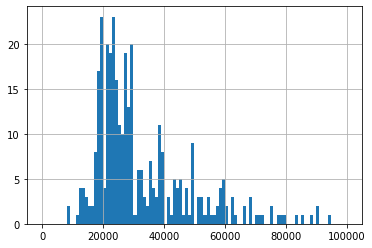

In [144]:
for item in items:
    crawling(item)

In [23]:
raw_data = pd.read_excel("화병 자수 티셔츠.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '화병 자수 티셔츠.xlsx'

In [ ]:
raw_data = raw_data[raw_data.columns[1:]]

In [16]:
raw_data

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
0,플라스틱아일랜드 반오픈 카라 허리스트링 데님 원피스 PL2DO581,61380,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.7 21 등록일 2020.06. 찜하기 88 정보 수정요청,False,1
1,뷔스티에 끈 나시 데님 롱 원피스,14100,패션의류 여성의류 원피스,핏 : 루즈핏 | 총기장 : 롱 | 소매기장 : 민소매 | 네크라인 : V넥 | 스...,쇼핑몰별 최저가,리뷰 별점 3.9 266 등록일 2019.05. 찜하기 999 정보 수정요청,False,1
2,발렌시아 스트링 A 라인 워싱 청 원피스 b06mo67,78000,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.7 15 등록일 2020.04. 찜하기 29 정보 수정요청,False,1
3,데님 멜빵 롱 끈 원피스,28200,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.6 18 등록일 2020.05. 찜하기 39 정보 수정요청,False,1
4,봄 여름 레이어드 끈 나시 뷔스티에 청 데님 포켓 원피스,19900,패션의류 여성의류 원피스,주요소재 : 면 | 핏 : 기본핏 | 총기장 : 롱 | 소매기장 : 민소매 | 네크...,쏘쭌,리뷰 29 구매건수 91 등록일 2020.04. 찜하기 103 신고하기 톡톡,False,1
...,...,...,...,...,...,...,...,...
355,여자 치마바지 노출 방지 치마 ASM 안나베 세로줄 디자인감 a라인 여름 워싱 하이웨이스,73700,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,9
356,데님원피스 BABE허리 끈허리띠 벌룬소매 데님 원피스 허리조임,91090,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,9
357,데님원피스 s2020봄여름 뉴타입 원형깃 패치워크 데님 체크무늬 플리츠스커트 끈허리띠,70000,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,9
358,여성 청 루즈핏 슬림핏 반팔 긴팔 멜빵 숏 롱 청 치마 허리끈 묶음 데님 원피스,32740,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,9


count       360.000000
mean      37598.102778
std       48447.448701
min         880.000000
25%       24415.000000
50%       29360.000000
75%       38507.500000
max      647420.000000
Name: 가격, dtype: float64


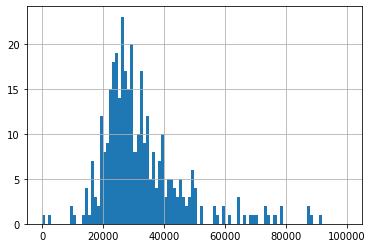

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
310,연청 진청 민소매 뷔스티에 루즈핏 나시 끈 프릴 데님 롱 원피스,29320,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
311,드레스바 한국판 스위트 앤티크 허리끈 리본 끈 소녀 어디든 캐주얼 데님 멜빵 원피스,26510,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
312,년 여름 단줄 다단추 미디움 통근 엘레강스 반팔 미디엄 데님 원피스,50850,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
313,여친 여름 카라넥 스트링 텐셀 데님 원피스,26000,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
314,데님원피스 대중적인디자인 느낌 데님 끈없는브라 루즈핏 셔츠 원피스,36700,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
315,노보 데님 포켓 포인트 스트링 멜빵 캉캉 원피스 NC2OP21C27H2,45900,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
316,플린by페이지플린 카라포켓스트링데님원피스 BMN0BOP116A,44440,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
317,여자 여름 스트랩 멜빵 끈 데님 미디원피스 - HGN000124529,36900,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
318,여자 카라넥 스트링 텐셀 데님 원피스,22750,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8
319,에이프릴래빗 플레어 스커트 휴양지원피스 여름옷 레트로 브이넥 소매 스트링 데님 스커...,30540,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,8


In [17]:
raw_data.describe()

raw_data.쇼핑몰.value_counts()

raw_data.쇼핑몰.value_counts().nlargest(10)

## 총 414개중에서 198개가 여러군대에 남품하고 있는 구조 (10페이지 안에 있는거에서)

raw_data["가격"].describe()

sum(raw_data["가격"] == 0)

#nan 값 뺀거
print(raw_data["가격"][raw_data["가격"] != 0].describe())
raw_data["가격"][raw_data["가격"] != 0].hist(bins = 100, range = (0, 100000))
plt.show()
## 가격 설정의 지표가 된다. 첫번째 상품 같은 경우에는 25

raw_data["태그"].value_counts()

raw_data["디테일"].value_counts()
#디테일 제대로 설명 안해놓은게 많다?? --> 우리는 제대로 해야한다.

raw_data.head(50) #첫번째 페이지 정보

raw_data.tail(50)

In [18]:
raw_data= raw_data[raw_data["페이지"] < 3]

In [19]:
raw_data

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
0,플라스틱아일랜드 반오픈 카라 허리스트링 데님 원피스 PL2DO581,61380,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.7 21 등록일 2020.06. 찜하기 88 정보 수정요청,False,1
1,뷔스티에 끈 나시 데님 롱 원피스,14100,패션의류 여성의류 원피스,핏 : 루즈핏 | 총기장 : 롱 | 소매기장 : 민소매 | 네크라인 : V넥 | 스...,쇼핑몰별 최저가,리뷰 별점 3.9 266 등록일 2019.05. 찜하기 999 정보 수정요청,False,1
2,발렌시아 스트링 A 라인 워싱 청 원피스 b06mo67,78000,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.7 15 등록일 2020.04. 찜하기 29 정보 수정요청,False,1
3,데님 멜빵 롱 끈 원피스,28200,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.6 18 등록일 2020.05. 찜하기 39 정보 수정요청,False,1
4,봄 여름 레이어드 끈 나시 뷔스티에 청 데님 포켓 원피스,19900,패션의류 여성의류 원피스,주요소재 : 면 | 핏 : 기본핏 | 총기장 : 롱 | 소매기장 : 민소매 | 네크...,쏘쭌,리뷰 29 구매건수 91 등록일 2020.04. 찜하기 103 신고하기 톡톡,False,1
...,...,...,...,...,...,...,...,...
75,여성 캐주얼 원피스 조이스틱 넥 스트링 워싱 데님 스커트 2020 여름 신상,27320,패션의류 여성의류 원피스,NaN,NaN,등록일 2020.07. 찜하기 0 신고하기,False,2
76,데님 스커트 초 소프트 텐셀 워싱 스트링 원피스 저장 보,35860,패션의류 여성의류 원피스,NaN,NaN,등록일 2020.07. 찜하기 0 신고하기,False,2
77,ab.f.z 데님레이어드끈원피스 AZU2GO90 LE1205115175,40970,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.06. 찜하기 2 정보 수정요청,False,2
78,끈나시 뷔스티에 플레어 a라인 스퀘어넥 청 데님 원피스,33600,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 5 1 등록일 2020.05. 찜하기 13 정보 수정요청,False,2


count        80.000000
mean      33700.500000
std       27092.473096
min         880.000000
25%       21975.000000
50%       26900.000000
75%       35895.000000
max      199020.000000
Name: 가격, dtype: float64


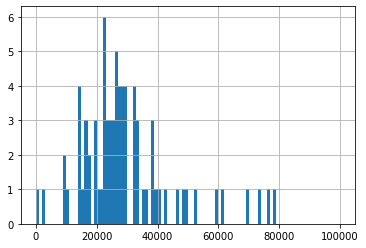

,이름,가격,태그,디테일,쇼핑몰,"찜,구매",광고상품,페이지
30,솔로이스트 스트링 데님 셔츠 원피스 SADK2651,19900,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.1 9 등록일 2020.04. 찜하기 11 정보 수정요청,False,1
31,데님 미니원피스 셔링 스트링 반팔 퍼프 청원피스,16900,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4 2 등록일 2020.06. 찜하기 7 정보 수정요청,False,1
32,"롱 앞트임 나시 ops (흑청, 주인장 바로 소장, 끈으로 허리조절가능해서 실용적)",36000,패션의류 여성의류 원피스,주요소재 : 데님 | 총기장 : 롱,오프 off,리뷰 38 구매건수 122 등록일 2020.04. 찜하기 110 신고하기 톡톡,False,1
33,밴딩 끈 청 데님 셔츠 롱원피스,16640,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.06. 찜하기 2 정보 수정요청,False,1
34,데님 롱원피스 끈조절가능 2col,26800,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 4.7 22 등록일 2020.03. 찜하기 29 정보 수정요청,False,1
35,러블리 걸스 다크블루 데님 서스펜더 원피스[고급 청 드레스 멜빵 끈 스트랩 진청 편...,114500,패션의류 여성의류 원피스,NaN,프린세스걸,리뷰 31 등록일 2020.03. 찜하기 0 신고하기,False,1
36,데님뷔스티에원피스 끈나시 여름원피스 레이어드,25400,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.06. 찜하기 8 정보 수정요청,False,1
37,소매 워싱 데님 스퀘어넥 스커트 여성 여름옷 스트링 슬림 스커트 J70739,26370,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,1
38,코데즈컴바인 데님 끈 원피스 CFB-DO201W4,38140,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,리뷰 별점 5 1 등록일 2020.04. 찜하기 6 정보 수정요청,False,1
39,A라인롱스커트 워싱 데님 멜빵 원피스 스트링 조임 나시 미디,14620,패션의류 여성의류 원피스,NaN,쇼핑몰별 최저가,등록일 2020.07. 찜하기 0 정보 수정요청,False,1


In [20]:
raw_data.describe()

raw_data.쇼핑몰.value_counts()

raw_data.쇼핑몰.value_counts().nlargest(10)

## 총 414개중에서 198개가 여러군대에 남품하고 있는 구조 (10페이지 안에 있는거에서)

raw_data["가격"].describe()

sum(raw_data["가격"] == 0)

#nan 값 뺀거
print(raw_data["가격"][raw_data["가격"] != 0].describe())
raw_data["가격"][raw_data["가격"] != 0].hist(bins = 100, range = (0, 100000))
plt.show()
## 가격 설정의 지표가 된다. 첫번째 상품 같은 경우에는 25

raw_data["태그"].value_counts()

raw_data["디테일"].value_counts()
#디테일 제대로 설명 안해놓은게 많다?? --> 우리는 제대로 해야한다.

raw_data.head(50) #첫번째 페이지 정보

raw_data.tail(50)

In [21]:
keyword = []
for i in raw_data["이름"]:
    keyword += i.split()
pd.Series(keyword).value_counts().head(20)

In [22]:
pd.Series(keyword).value_counts().head(20)

데님      63
원피스     53
끈       25
스트링     21
워싱      17
멜빵      16
뷔스티에    16
청       15
나시      15
롱       13
스커트      9
끈나시      8
여름       7
여성       7
반팔       7
롱원피스     6
카라       5
셔츠       5
레이어드     4
허리끈      4
dtype: int64

In [161]:
raw_data["이름"].head(40)

0                             [무료배송] 브이넥 셔링 캉캉 롱 프릴 원피스
1                         스퀘어넥 소매퍼프 오버핏 셔링 롱 원피스 2color
2              루즈핏 빅사이즈 쉬폰 하객 반팔 퍼프 린넨 여름 롱원피스 임산부 데이트룩
3                         빅사이즈 오버핏 롱 브이넥 체크 원피스(2color)
4     (당일발송)2color 리베크 루즈핏 라운드넥 베이비돌 핀턱 퍼프 반팔 셔링 a라인...
5                              허리스트링 셔링 코튼 A라인 반팔 롱 원피스
6                               라운드 퍼프 스트링 주머니 플레어 롱원피스
7                                           셔링 체크 롱 원피스
8     브이넥 호피 레오파드 롱 원피스 (아이보리,그린) 여름 플라워 쉬폰 패턴 반팔 볼륨...
9            스윗 퍼프 원피스 봄 여름 반팔 셔링 핀턱 스퀘어 플레어 플리츠 하객 A라인
10                           슬림 꼬임 셔링 카라 셔츠원피스 (4color)
11    여름 고급 플라워 아일렛 꽃 펀칭 레이스 자수 퍼프 소매 셀프웨딩 루즈핏 맥시 롱 원피스
12    원스컴퍼니 베이비돌 스퀘어넥 여름 잔꽃 플라워 퍼프 소매 셔링 쉬폰 라인 플레어 롱원피스
13                 아뜨랑스 언발 셔링 디테일의 7부소매 셔츠카라 원피스 OP6719
14             (무배)문정원 나시 블랙 원피스 어깨프릴 민소매 휴가 휴양지 루즈핏원피스
15    (당일발송)2color 우아 하객 드레이프 셔링 오프숄더 청순 실키 새틴 a라인 결...
16                                 코튼 절개 셔링 반팔 퍼프소매 원피스
17         하와이 홀리데이 퍼프 핀턱 주름 플레어 반팔 여름 제주도 여행 여름